<a href="https://colab.research.google.com/github/yoonputer/Team_Project2/blob/master/Deeplearning/test_dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 설치

konlpy

mecab

In [ ]:
! ls ./drive/MyDrive/Forkspoon/dummy1.xlsx

In [ ]:
!python -m pip install konlpy

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!source ./mecab.sh

## 데이터 가져오기

In [ ]:
!ls ./drive/MyDrive/Forkspoon/db.sqlite3

In [6]:
import sqlite3
import pandas as pd
connect = sqlite3.connect('./drive/MyDrive/Forkspoon/db.sqlite3')

In [7]:
choice = pd.read_sql_query('select * from write_choice',connect)

In [8]:
type(choice)
choice_cols = choice[['점수','질문','답변']]
choice_cols

,점수,질문,답변
0,2.0,입사 지원동기를 작성해주세요. (① 지원 부문을 선택한 이유와 ② 지원 부문과 관련...,"\n경영은 전사의 콘텐츠 제작에서부터 유통 과정을 파악하고, 설정한 목표를 이루기 ..."
1,3.0,"우리 공단에 지원동기와 직무를 선택한 이유, 입사 후 목표와 포부를 기술해 주십시오...","\n""‘재료’를 전공하며 나의 가치를 증명하다""\n 제조업은 우리나라 경제의 주요 ..."
2,2.0,"지원직무를 선택한 이유를(직무와 관련한 경험, 전공, 수강과목, 자격증 등을 포함하...","\n""직접 만든다는 것""\n 실습을 위해 콤부차를 조사하였습니다. 한정된 자료에서 ..."
3,2.0,본인이 선택한 직무에 대해 아래 내용을 포함하여 기술하시오. ①지원한 직무의 역할이...,\n`전지적 참견 시점`\n 영업관리 직무는 BGF리테일의 점포 관리를 위한 매니저...
4,4.0,"본인이 선택한 직무를 담당하고 싶은 이유, 적합성 등에 대해 자유롭게 설명해 보십시...",\n16살에 처음 회계를 접하고 흥미를 느껴 뚜렷한 진로 방향을 형성했습니다.\n기...
...,...,...,...
2992,2.0,화천그룹 및 해당분야 지원동기최소 (30~400),"\n공작기계분야에 있어서 두산인프라코어, 현대위아와 어깨를 나란히 하는 화천기계는 ..."
2993,4.0,지원동기 및 입사 후 포부,"\n(`마트`라는 채널에서 보고 느낀 영업사원들의 모습)\n마트에서 일하면서 판매,..."
2994,4.0,직무 지원동기,"\n<사람을 좋아하는 마음, 경험과 지식을 통해 또 다른 가치를 만들다> \n새로운..."
2995,5.0,LG디스플레이 및 지원 직무에 지원하는 동기에 대해 기술해 주십시오. 성격(장단점)...,\n‘2015 나노 코리아’에서 LG OLED UHD TV를 보고 말을 잃었습니다....


## NLP 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_data = choice_cols['답변']
y_data = choice_cols['점수']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((2247,), (2247,), (750,), (750,))

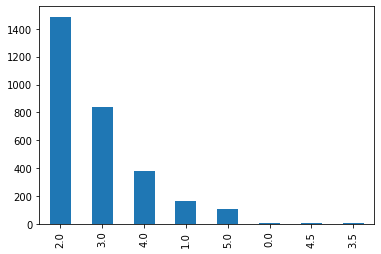

In [12]:
y_data.value_counts().plot(kind='bar')

In [13]:
type(x_train)

pandas.core.series.Series

In [14]:
x_temp = x_train
x_temp= x_temp.str.replace('[^가-힣ㄱ-ㅎ0-9ㅏ-ㅣ]','')
x_temp

2389    첫직장인근로복지공단에입사한후신입직원으로서열정을보이고싶었습니다좋은점1부서별조직도와업무...
2701    인턴경력에서나오는준비된인재저는해외경제연구및조사부문에서제능력을발휘할것으로생각합니다해외...
63      티웨이항공을선택한이유는앞으로더치열해질경쟁속에서티웨이항공과함께성장해나가는인재가되고싶기...
2275    에너지복지국민의행복는천연가스를국민에게안전하고안정적으로공급하기위해좋은에너지더좋은세상을...
1636    전공지식을위한노력화학공학에서배우는분리공정설계와공정제어과목을수강하며공정에대해익혔고열교...
                              ...                        
2086    생산설비관리제조설비의기능및가동율을분석하고생산공정이효율적으로운영될수있도록관리및개선도전...
126     기업의방향성을위해모든것을알아야하는직무경영기획직무에서중요한것은분석력과전사적관점입니다자...
2290    핸즈코퍼레이션의새로운성장엔진저는뛰어난기술력을통해세계적인기업으로성장하는핸즈코퍼레이션의...
1010    학부시절과대표를맡으며를기획할때적절한인재의기용을통해성공적인를만든경험이있습니다맨처음저는...
1267    금호건설급박하게바뀌는세계건설시장에빠르고새로운도전을통해건설업의새로운패러다임을제시하는금...
Name: 답변, Length: 2247, dtype: object

### stopwords

```
import pandas as pd

lst_A = ['a','b','c','d', 'e', 1, 2]
df = pd.DataFrame(lst_A)

df.columns=['']

import numpy as np

np.array(df[0].tolist())
```

In [15]:
stopwords = pd.read_sql_query('select * from stopwords',connect)

stopwords.describe()

type(stopwords)

pandas.core.frame.DataFrame

In [16]:
import numpy as np

ko_stopwords_list = np.array(stopwords['words'].tolist())
ko_stopwords_list

array(['이', '있', '하', ..., '잘', '통하', '놓'], dtype='<U4')

### Mecab

In [17]:
from konlpy.tag import Mecab
mecab= Mecab()

In [ ]:
# mecab.pos(x_temp[0])
mecab.morphs(x_temp[0])

```
'아니',
 '라',
 '확장',
 '된',
 '영역',
 '의',
 '업무',
 '를',
 '수행',
 '하',
 '는',
 '데',
 '에',
 '도',
 '준비',
 '되',
 '어',
 '있',
 '습니다',
 '아쉬운',
 '점',
 '3',
 '글자',
 '수',
 '649',
 '자',
 '1122']
```

In [54]:
def non_stopwords(sentance):
  sentance = list ()
  
  for tok in x_temp:
    encoded = mecab.morphs(tok)

    sentance.append([item for item in encoded if item not in ko_stopwords_list])

  return sentance

```
 '자동차',
  '연결',
  '스마트',
  '그리드',
  '완성',
  '서비스',
  '입니다',
  '세계',
  '모든',
  '전력망',
  '연결',
  '효율',
  '운용',
  '자원',
  '낭비',
  '환경',
  '파괴',
  '막',
  '그날',
  '그려',
  '봅니다',
  '아쉬운',
  '1',
  '글자',
  '698',
  '1203'],
 ...]
```

## Tokenizer

In [20]:
import tensorflow as tf

In [21]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [22]:
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.word_index

```
 '설립': 965,
 '인생': 966,
 '목표달성': 967,
 '서버': 968,
 '불만': 969,
 '의약품': 970,
 '지난': 971,
 '맞춰': 972,
 '주인': 973,
 '기억': 974,
 '변수': 975,
 '초기': 976,
 '관찰': 977,
 '기를': 978,
 '선': 979,
 '결과물': 980,
 '주력': 981,
 '펼치': 982,
 '역사': 983,
 '확실': 984,
 '아버지': 985,
 '따뜻': 986,
 '이벤트': 987,
 '코드': 988,
 '키워왔': 989,
 '객사': 990,
 '아시아': 991,
 '철저히': 992,
 '높여': 993,
 '인터뷰': 994,
 '세대': 995,
 '점유': 996,
 '직': 997,
 '범위': 998,
 '연구소': 999,
 '근로자': 1000,
 ...}
```

In [ ]:
tokenizer.word_counts

```
            ('즐거움', 94),
             ('느낄', 101),
             ('확신', 206),
             ('리튬', 9),
             ('이온', 15),
             ('전기차', 14),
             ('따', 11),
             ('밀도', 14),
             ('가격', 172),
             ('초점', 16),
             ('양극', 7),
             ('재의', 1),
             ('격차', 20),
             ('줄어들', 11),
             ('품질', 479),
             ('세대', 50),
             ('해졌', 18),
             ('셀', 52),
             ('수명', 26),
             ('전압', 20),
             ...])
```

In [25]:
total_cnt = len(tokenizer.word_index)

In [26]:
rare_cnt = 0
total_freq,rare_freq = 0,0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value #전체 단어의 수
  if(value <=2):
    rare_cnt = rare_cnt+ 1  
    rare_freq = rare_freq + value #2미만인 단어(희귀단어)의 수

In [27]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(16423, 8664, 52.755282226146264, 3.600153198008426)

In [28]:
vocab_size = total_cnt - rare_cnt #보케블러리 사이즈
vocab_size 

7759

In [29]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [30]:
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.index_word

```
 983: '펼치',
 984: '역사',
 985: '확실',
 986: '아버지',
 987: '따뜻',
 988: '이벤트',
 989: '코드',
 990: '키워왔',
 991: '객사',
 992: '아시아',
 993: '철저히',
 994: '높여',
 995: '인터뷰',
 996: '세대',
 997: '점유',
 998: '직',
 999: '범위',
 1000: '연구소',
 ...}
```

## To int 


In [32]:
x_train = tokenizer.texts_to_sequences(sentance)

In [33]:
len(x_train[0]),len(x_train[40]),len(x_train[50])

(107, 180, 138)

In [34]:
hist_len = [len(words) for words in x_train]

In [35]:
import matplotlib.pyplot as plt

(array([  7.,   2.,  11.,  28.,  62.,  71., 120., 183., 260., 254., 194.,
        198., 163., 126.,  85.,  99.,  96.,  91.,  72.,  48.,   8.,   8.,
          9.,  10.,   3.,   8.,   2.,   3.,   3.,   5.,   3.,   2.,   2.,
          5.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  5.  ,  16.48,  27.96,  39.44,  50.92,  62.4 ,  73.88,  85.36,
         96.84, 108.32, 119.8 , 131.28, 142.76, 154.24, 165.72, 177.2 ,
        188.68, 200.16, 211.64, 223.12, 234.6 , 246.08, 257.56, 269.04,
        280.52, 292.  , 303.48, 314.96, 326.44, 337.92, 349.4 , 360.88,
        372.36, 383.84, 395.32, 406.8 , 418.28, 429.76, 441.24, 452.72,
        464.2 , 475.68, 487.16, 498.64, 510.12, 521.6 , 533.08, 544.56,
        556.04, 567.52, 579.  ]),
 <a list of 50 Patch objects>)

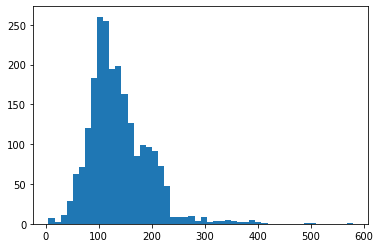

In [36]:
plt.hist(hist_len, bins=50)

- Pad 몇정도 하면 좋을지 여기서 확인

In [37]:
sum(hist_len)/ len(x_train)

137.1152647975078

In [38]:
x_train =tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300)

In [39]:
x_train

array([[   0,    0,    0, ...,    8, 2447, 3256],
       [   0,    0,    0, ...,    8, 4670, 5351],
       [   0,    0,    0, ...,    8,    1,    1],
       ...,
       [   0,    0,    0, ...,    8, 5445,    1],
       [   0,    0,    0, ...,    8, 4190,    1],
       [   0,    0,    0, ...,    8, 5249, 3296]], dtype=int32)

In [40]:
len(y_train)

2247

In [41]:
np.unique(y_train)

array([0. , 1. , 2. , 3. , 3.5, 4. , 4.5, 5. ])

In [42]:
type(y_train)

pandas.core.series.Series

In [43]:
len(x_train), len(y_train)

(2247, 2247)

## Model

In [44]:
model = tf.keras.models.Sequential()

In [45]:
model.add(tf.keras.layers.Embedding(input_dim= vocab_size, output_dim =30 ,input_length=300))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(8,activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.3, shuffle=True)

```
7/7 [==============================] - 19s 3s/step - loss: 0.0106 - acc: 0.9949 - val_loss: 3.2025 - val_acc: 0.4504
Epoch 96/100
7/7 [==============================] - 19s 3s/step - loss: 0.0101 - acc: 0.9949 - val_loss: 3.1945 - val_acc: 0.4667
Epoch 97/100
7/7 [==============================] - 19s 3s/step - loss: 0.0089 - acc: 0.9949 - val_loss: 3.1960 - val_acc: 0.4578
Epoch 98/100
7/7 [==============================] - 19s 3s/step - loss: 0.0085 - acc: 0.9955 - val_loss: 3.2483 - val_acc: 0.4519
Epoch 99/100
7/7 [==============================] - 19s 3s/step - loss: 0.0076 - acc: 0.9949 - val_loss: 3.3383 - val_acc: 0.4504
Epoch 100/100
7/7 [==============================] - 19s 3s/step - loss: 0.0070 - acc: 0.9949 - val_loss: 3.3534 - val_acc: 0.4533
```

## Evaluation


In [48]:
model.evaluate(x_train, y_train) #loss: 0.0070 - acc: 0.9949 - val_loss: 3.3534 - val_acc: 0.4533

71/71 [==============================] - 8s 113ms/step - loss: 1.0121 - acc: 0.8322


[1.0120925903320312, 0.832220733165741]

## Service

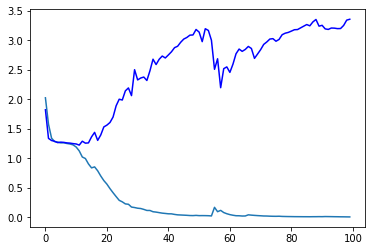

In [50]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

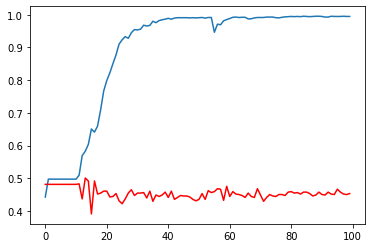

In [51]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()

In [52]:
x_train

array([[   0,    0,    0, ...,    8, 2447, 3256],
       [   0,    0,    0, ...,    8, 4670, 5351],
       [   0,    0,    0, ...,    8,    1,    1],
       ...,
       [   0,    0,    0, ...,    8, 5445,    1],
       [   0,    0,    0, ...,    8, 4190,    1],
       [   0,    0,    0, ...,    8, 5249, 3296]], dtype=int32)

In [53]:
y_train

2389    2.0
2701    2.0
63      3.0
2275    3.0
1636    2.0
       ... 
2086    1.0
126     2.0
2290    2.0
1010    2.0
1267    2.0
Name: 점수, Length: 2247, dtype: float64

In [ ]:
def fname():
  

  return